# Data Visualization

## Learning Goals

- Use `matplotlib` syntax to create graphs and adjust elements
- Create figures containing multiple graphs
- Choose appropriate graph types based on data and problem context for explanatory visualizations


In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# same as 
# from matplotlib import pyplot as plt

import seaborn as sns

from scipy import stats
from sklearn.datasets import load_iris

## Visualization Motivation: Why Visualize Data?

Why can’t we just hand someone a table of data?

Let's load up the iris data set.  This is a famous built-in dataset which is used to learn about categorization. 

In [2]:
# This iris dataset comes bundled with sklearn
data = load_iris()
df_iris = pd.DataFrame(data['data'], columns=data['feature_names'])
df_iris['target'] = data['target']

Here is an image of one of the virginica iris, which is unique in its relative petal and sepal length.

![virginica_iris](images/iris_virginica.jpg)

### Dataframe vs. Statistics vs. Graph: Which do you prefer?

In [3]:
# Five random rows of the iris dataset
df_iris.sample(5, random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


What information in this dataframe jumps out to you?

- 


In [4]:
# Summary statistics of the iris dataset
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


What information in this summary statistics table jumps out to you?

- 


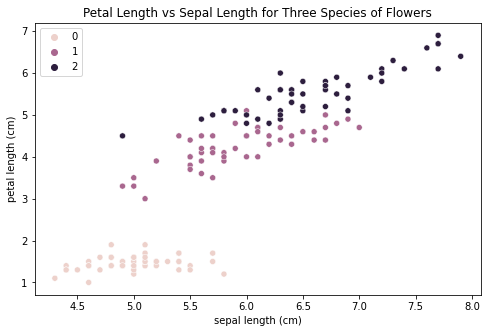

In [5]:
# Now, let's plot two variables from the iris dataset
fig, ax = plt.subplots(figsize=(8, 5))

# Use seaborn to plot two facets of the above data, colored by the target column
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='target', data=df_iris)

ax.set_title('Petal Length vs Sepal Length for Three Species of Flowers')
ax.legend();

What information in this graph jumps out to you?

- 


### Visualizing for Yourself vs. Visualizing for Others

An important point: you're going to be creating two kinds of visualizations - ones you create for yourself, to explore your own data, and ones you create for others, to share your findings.

AKA: **exploratory** vs **explanatory** plots!

Our goal with **exploratory** visualizations is to better understand the data, and we often don't really intend to share these plots - but you should still get in the habit of labeling your plots and writing out your findings and observations (either in markdown/code comments or using titles/annotation on the plots)! This will help you quickly get up to speed when you revisit your work later, or will be helpful when others stumble upon your work.

Our goal in **explanatory** visualizations is to convey/communicate insight(s) effectively to our audience. That audience can be other data scientists but can also be stakeholders unfamiliar with data analysis or statistical concepts.

Some guidelines when creating **explanatory** visualizations (which should also apply to exploratory plots):

- Each graph should have one clear point it is trying to make. Don't try to do too much with one plot!

- Know your audience! Come up with a use case and audience to help guide your decision-making process - if you know your audience, and you know what they care about and what they need, everything in the process gets easier

- Choose the correct graph for the relationship you are trying to communicate

- Label your axes and graph! It should not be difficult for someone to understand what your graph is trying to represent

- People have unconscious responses to visuals which will effect the way they interpret information. Good visualization makes use of these natural shortcuts in cognition to convey information more efficiently
    - Red and Down tends to be negative while Green and Up is positive
    - Lighter hues are seen as lower values and darker is higher values
    - Axis start at zero
        
__Note:__ All of these 'rules' can be broken but know that you will be working against most people's first instinct


Our goal today is to help you be able to create both!

## Plotting Syntax

Let's read in some new data:

In [7]:
# This is a default penguins dataset that comes bundled with seaborn
penguins = sns.load_dataset('penguins')

In [9]:
type(penguins)

pandas.core.frame.DataFrame

In [8]:
# Check it out
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Pandas `.plot`

Let's start with the simplest way to plot data - using pandas built-in methods.

Documentation! https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

Goal: Create a scatterplot showing flipper_length_mm and body_mass_g.

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

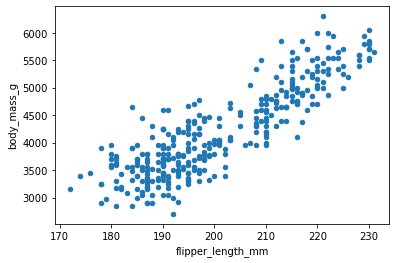

In [12]:
# Simple way to throw a plot on top of data
penguins.plot(x='flipper_length_mm', y='body_mass_g', kind='scatter')

Text(0.5, 1.0, 'Flipper Length VS Body Mass')

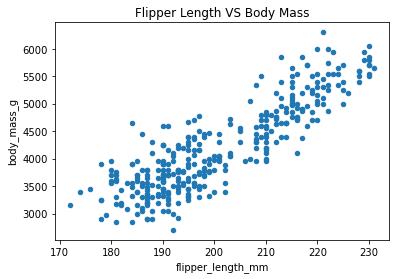

In [14]:
# Can also specify the kind of plot this way
penguins.plot.scatter(x='flipper_length_mm', y='body_mass_g')

plt.title("Flipper Length VS Body Mass")

This is a pretty simple way to plot data - it's based on matplotlib, there are a good amount of options you can pass to play around with it, and you can stack this with matplotlib functions to do things like add titles or axis labels.

This is a good option if you are exploring data.

### Seaborn

Seaborn, like pandas plotting, is built on top of matplotlib, and is designed to make certain things you might want to try or explore a bit easier.

Documentation! https://seaborn.pydata.org/api.html

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

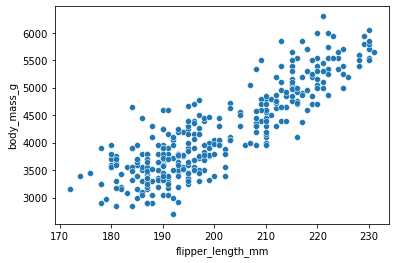

In [23]:
# Recreate the same plot in seaborn
sns.scatterplot(x=penguins['flipper_length_mm'], y=penguins['body_mass_g'])

One nice thing about seaborn is that many of their plots take the 'hue' argument, which effortlessly designates a category with colors:

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

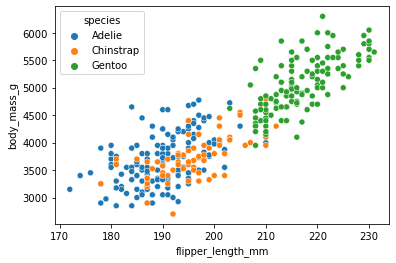

In [17]:
# Color by penguin species
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=penguins, hue='species')

Seaborn can be great for both kinds of plots - they're easy to put together and make exploring data pretty efficient, and their default plots often look nice effortlessly. 

### Matplotlib

At the end of the day, these other plotting methods are all built on top of matplotlib - thus, you have to get comfortable with matplotlib syntax in order to build more specific or more effective plots.

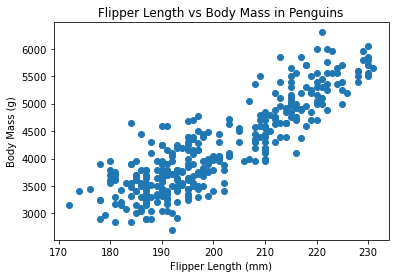

In [22]:
# This is one matplotlib syntax - the non-fig/ax method
plt.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])

plt.title("Flipper Length vs Body Mass in Penguins")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")

plt.show()


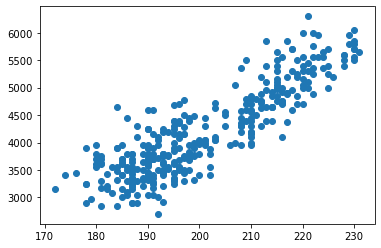

In [24]:
# This is the other plotting syntax. Note that plt.subplots()
# returns two things: the figure object and the axis object
# This option gives you the MOST flexibility and access to matplotlib elements!
fig, ax = plt.subplots()

ax.scatter(penguins['flipper_length_mm'], penguins['body_mass_g'])

### Anatomy of a `matplotlib` Figure
<img src="images/matplotlib_anatomy.png">

Explanation of non-obvious terms:

__Figure__ - This is the "sheet of paper" all of your graphing sits on. 

__Axis__ - An axis is an individual plot. You can have multiple axes on one figure

__Major/Minor Ticks__ - The large and small dashes on the x and y axis

__Markers__ - In a scatter plot each of the points is refered to as a marker

__Spines__ - The lines that bound each axis

### Getting Granular!

#### Change color, opacity, marker size, and marker symbol

Resources:
- Named colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
- Marker symbols: https://matplotlib.org/3.2.1/api/markers_api.html

#### Can identify colors by hexadecimal code

#### Add a third variable by setting the color (or size) equal to a third column

#### Layer plots on top of each other, to provide potentially useful context

#### Annotate directly on the plot!

In [ ]:
# More granular with annotations...


#### Adjust the axis labels to more clearly show the scale of our plots

In [ ]:
# need a new import


#### Save the plot as an image file

### Multiple Plots (Axes)

Sometimes we want multiple plots to be a part of the same figure.

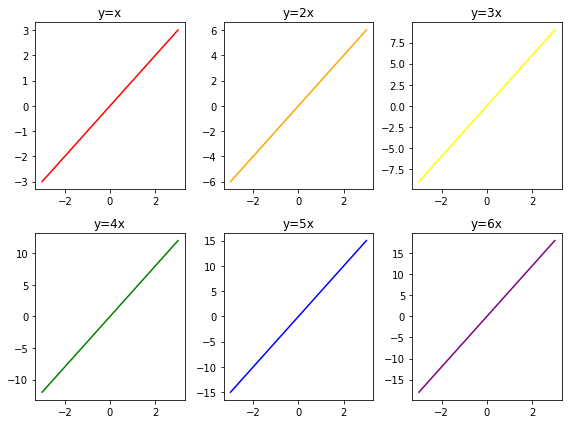

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
# The above line gives me a figure with six subplots,
# arranged in two rows of three.

X = np.linspace(-3, 3, 100)
Ys = [[j*x for x in X] for j in range(1, 7)]

ax[0, 0].plot(X, Ys[0], c='red')
ax[0, 0].set_title('y=x')

ax[0, 1].plot(X, Ys[1], c='orange')
ax[0, 1].set_title('y=2x')

ax[0, 2].plot(X, Ys[2], c='yellow')
ax[0, 2].set_title('y=3x')

ax[1, 0].plot(X, Ys[3], c='green')
ax[1, 0].set_title('y=4x')

ax[1, 1].plot(X, Ys[4], c='blue')
ax[1, 1].set_title('y=5x')

ax[1, 2].plot(X, Ys[5], c='purple')
ax[1, 2].set_title('y=6x')

plt.tight_layout()

#### Slightly Different Notation

Note we could change the notation to unpack the passed axes in different ways. This can be useful in how we use the axis to make different plots.

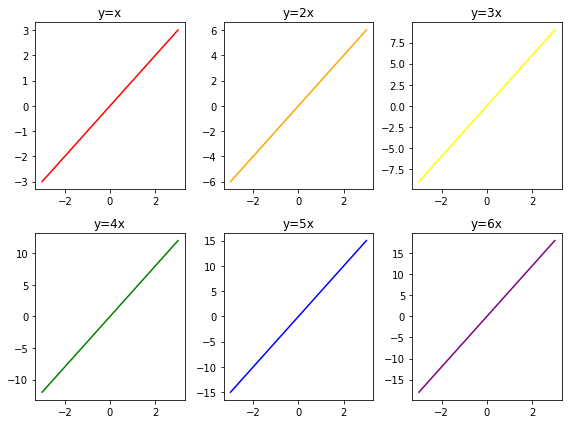

In [26]:
# This saves two arrays of axes representing each row and elements referring to 
# the columns
fig, (ax_row0, ax_row1) = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

Ys = [[j*x for x in X] for j in range(1, 7)]

## First Row
ax_row0[0].plot(X, Ys[0], c='red')
ax_row0[0].set_title('y=x')

ax_row0[1].plot(X, Ys[1], c='orange')
ax_row0[1].set_title('y=2x')

ax_row0[2].plot(X, Ys[2], c='yellow')
ax_row0[2].set_title('y=3x')

## Second Row
ax_row1[0].plot(X, Ys[3], c='green')
ax_row1[0].set_title('y=4x')

ax_row1[1].plot(X, Ys[4], c='blue')
ax_row1[1].set_title('y=5x')

ax_row1[2].plot(X, Ys[5], c='purple')
ax_row1[2].set_title('y=6x')

plt.tight_layout()

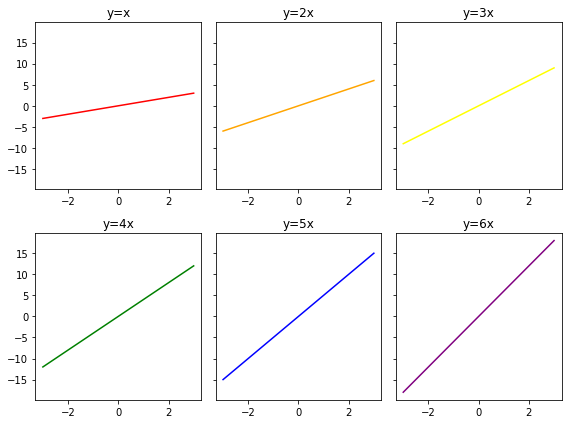

In [29]:
# This unpacks each axis as a separate variable
fig, ((ax00, ax01, ax02), (ax10, ax11, ax12)) = plt.subplots(nrows=2, ncols=3, figsize=(8, 6), sharey=True)

Ys = [[j*x for x in X] for j in range(1, 7)]

## First Row
ax00.plot(X, Ys[0], c='red')
ax00.set_title('y=x')

ax01.plot(X, Ys[1], c='orange')
ax01.set_title('y=2x')

ax02.plot(X, Ys[2], c='yellow')
ax02.set_title('y=3x')

## Second Row
ax10.plot(X, Ys[3], c='green')
ax10.set_title('y=4x')

ax11.plot(X, Ys[4], c='blue')
ax11.set_title('y=5x')

ax12.plot(X, Ys[5], c='purple')
ax12.set_title('y=6x')

plt.tight_layout()

#### Customize Multiple Plot Grid

We can add some parameters to `plt.subplots()` that allow us to treat the different axes the same

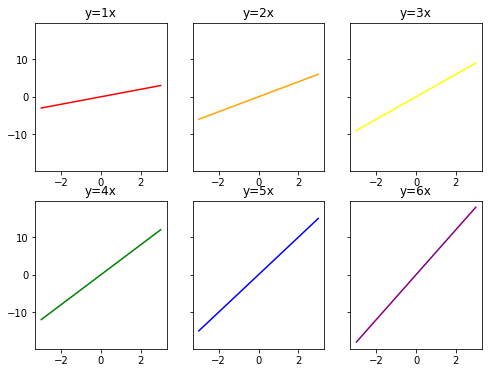

In [31]:
nrows = 2
ncols = 3
fig, ax = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(8, 6),
    sharey=True     # This allows the y-axis to be consistent
)


Ys = [[j*x for x in X] for j in range(1, 7)]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
n = 0

for r in range(nrows):
    for c in range(ncols):
        ax[r, c].plot(X, Ys[n], c=colors[n])
        ax[r, c].set_title(f'y={n+1}x')
        n += 1

plt.savefig("images/example.png")

## Exploring Plot Types

![image source: https://multimedia.journalism.berkeley.edu/tutorials/visualizing-data-a-guide-to-chart-types/](https://multimedia.journalism.berkeley.edu/wp-content/uploads/Screen-Shot-2016-08-11-at-1.34.23-PM.png)

[Image Source](https://multimedia.journalism.berkeley.edu/tutorials/visualizing-data-a-guide-to-chart-types/)

A nice overview!

For a similar reference specifically for python plots, check out the [Python Graph Gallery](https://python-graph-gallery.com)

You'll notice that these are sorted by what you want to showcase/demonstrate - the most important thing you should consider when starting to plot data is what exactly you're looking for or trying to say!

## Accessible Visualizations!

PLEASE READ this excellent blog post walking through how to make your charts both more effective and more accessible to all: https://flourish.studio/blog/accessible-chart-design/

Specifically, they focus on accessibility along three aspects of visualizations: Text, Color, and Animation (yes, there are ways to make animated plots in python!)

A teaser (aka the first two paragraphs of the post):

> When putting together a visualization or data story, it’s useful to remember that not everyone experiences the world as you do. A color palette that looks pretty to your eye might be difficult to differentiate for some viewers. Or a chart that you find easy to “read” might be hard to interpret for someone less data literate.
>
> This is a problem. If we don’t make our visuals accessible, not everyone can understand them, reducing their engagement and impact.


# YOUR TURN

## Back to our Austin Animal Center Data

We'll set up the data and some visualizations together.

In [ ]:
# Read in our data - and let's go ahead and parse the dates in the DateTime column


In [ ]:
# Check it out


In [ ]:
# Check the dataframe's info to make sure the dates were parsed correctly


## What Are The Most Common Animal Types?

In [ ]:
# can access the data we need with value counts


In [ ]:
# Is this a good time for a pie chart?


Discuss:

- 


In [ ]:
# What about a bar graph?


Discuss:

- 


### Your Task: Improve This Visualization!

Your goal is to visualize what you think the purpose of the plot is - adjust colors or plot type, add annotations, etc etc to make this plot more effective. You'll be in small groups for about 10 minutes, then we'll come back and share!

In [ ]:
# Your code here

Discuss:

- 


# Level Up: Additional Customization

## Style Sheets

[Style Sheets](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html) can add extra customization to your plots.

In [ ]:
# Uses this "style" for the rest of your notebook
plt.style.use('fivethirtyeight')

In [ ]:
## Showing a plot with this style
fig, ax = plt.subplots()

X = np.linspace(-3, 3, 100)
y = X**2
ax.plot(X, y)
ax.set_title('Parabola with words')
ax.text(s='random comment', x=0, y=3)
ax.annotate(text='minimum!', xy=(0, 0), xytext=(1, -4),
           arrowprops={'facecolor': 'black'});

In [ ]:
# Go back to the default style 
plt.style.use('default')

### Context Manager for Temporary Style

We can have temporary style change by using a [context manager for our style](https://matplotlib.org/stable/tutorials/introductory/customizing.html#temporary-styling).

In [ ]:
# Allows your us to use a temporary style just for the plot in block of code
with plt.style.context('ggplot'):
    fig, ax = plt.subplots()

    X = np.linspace(-3, 3, 100)
    y = X**2
    ax.plot(X, y)
    ax.set_title('Parabola with words')
    ax.text(s='random comment', x=0, y=3)
    ax.annotate('minimum!', xy=(0, 0), xytext=(1, -4),
                arrowprops={'facecolor': 'black'})

### The xkcd Style

The [xkcd style](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xkcd.html) can be a convenient style when you want to emphasize that the data shouldn't be taken seriously (such as an estimate versus showing real data).

In [ ]:
# This also allows to use the xkcd style temporarily
with plt.xkcd():
    fig, ax = plt.subplots()

    X = np.linspace(-3, 3, 100)
    y = X**2
    ax.plot(X, y)
    ax.set_title('Parabola with words')
    ax.text(s='random comment', x=0, y=3)
    ax.annotate('minimum!', xy=(0, 0), xytext=(1, -4),
                arrowprops={'facecolor': 'black'})

## More on Effective Visualizations

### What Types Work Well Consistently

Experts and researchers found the best visual patterns humans identify well:

> - Positional changes (scatter plots)
> - Length changes (bar charts)

But we're bad at understanding other patterns...

> - Color hue changes 
> - Area changes (pie charts!)

### How to Lie with Graphs

- Graphs can be misleading
- Consciously or unconsciously people will make decisions to lead people towards their conclusions of the data

- Examples of dark patterns
    - Changing the axis scale
    - Using two different y axis scales to compare trends
    - Showing cumulative data which will always be increasing to hide a downturn in a trend
    - Pie charts (comparing degrees is not something people are good at) just use a bar chart
    - Inconsistent units
    - Not showing all of the data for motivated reasons
    - Percentages not adding up to 100

<img src="images/pie-chart-misleading.png">

[image source](http://flowingdata.com/2009/11/26/fox-news-makes-the-best-pie-chart-ever/)

## Level Up Exercise: Picking Proper Plots

Now that we've seen a few different visualizations, let's have a quick quiz in deciding would be a good plot for a given scenario:

###  Scenario 1

> **SCENARIO**: We have a company's past financial reports. We want to compare how a company's revenue has done over these past few years.

🤔 _What type of visualization do you choose?_

<details>
    <summary>Possible Answers</summary>
    <ul>
        <li>Line Plot</li>
        <li>Bar Chart</li>
    </ul>
</details>

###  Scenario 2

> **SCENARIO**: We're given a company's last quarterly report on sales from its  website. We want to show the relationship of the number of orders broken down by the type of device the order was placed on.

🤔 _What type of visualization do you choose?_

<details>
    <summary>Possible Answers</summary>
    <ul>
        <li>Bar Chart</li>
        <li>Stacked Bar Chart</li>
    </ul>
</details>

###  Scenario 3

> **SCENARIO**: A food delivery service has a breakdown of this past week's orders. We want to show the relationship of the tips given in relation to the total bill.

🤔 _What type of visualization do you choose?_

<details>
    <summary>Possible Answers</summary>
    <ul>
        <li>Scatter Plot</li>
    </ul>
</details>